In [1]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import cartopy.crs
%matplotlib inline

In [7]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
data=pd.read_csv('No NSB sites age depth.csv')

In [4]:
longs=data['Site Longitude']
lats=data['Site Latitude']
depth=data['Bottom of deepest lithology']
age=data['Oldest sediment rough age']
name=data['Site Name']
model=data['Good model in reports']

In [57]:
#filename = 'No NSB sites age depth.csv'

#scatter=np.loadtxt(filename, dtype = (str,float,str,float,float,int,float,float), delimiter=',',skiprows=1)
#print(scatter)

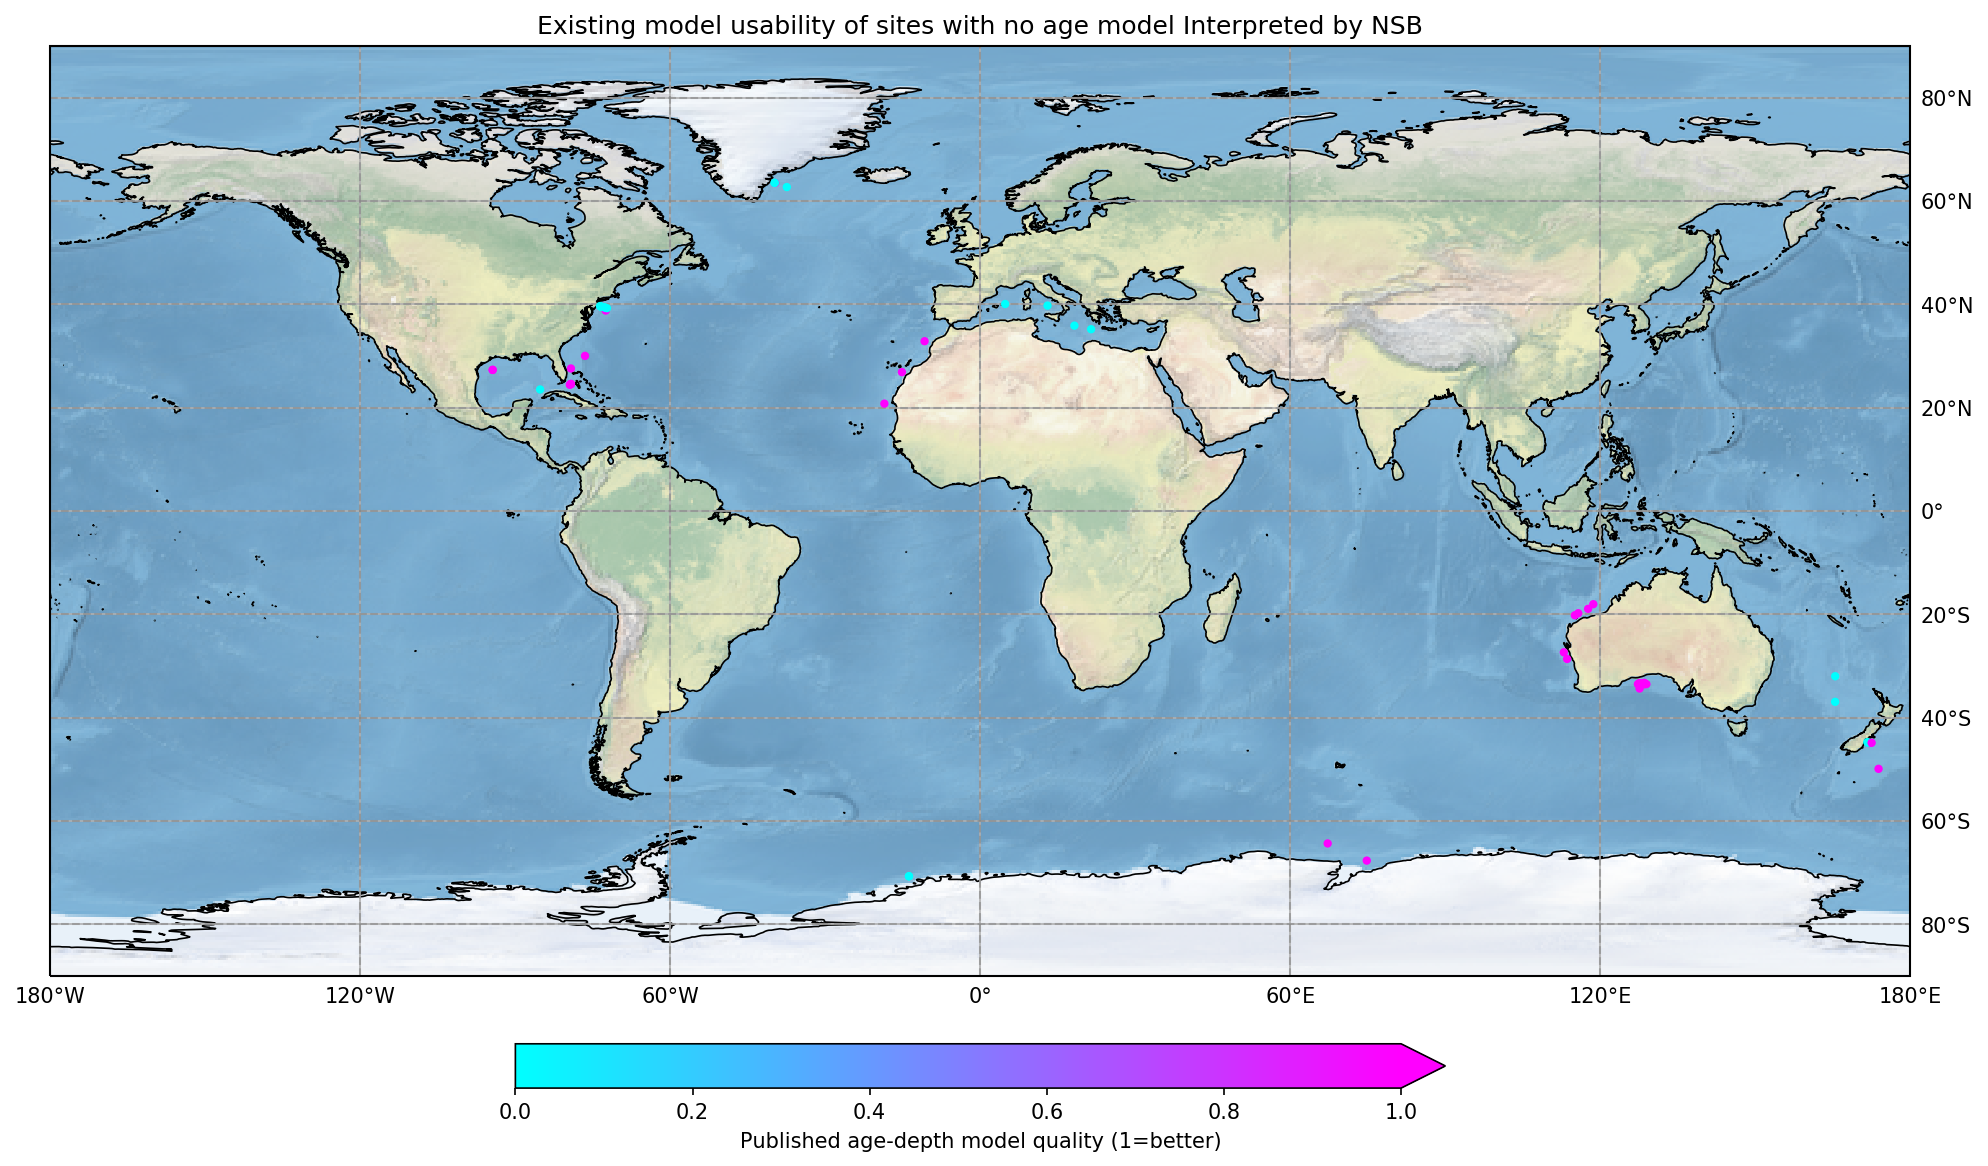

In [13]:
#map of report depth age model usability
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
mapscat=ax.scatter(longs,lats,marker=".",c=model,vmin=0,vmax=1,transform=cartopy.crs.Geodetic(),zorder=4,cmap=plt.cm.cool)

cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Published age-depth model quality (1=better)')

plt.title('Existing model usability of sites with no age model Interpreted by NSB')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

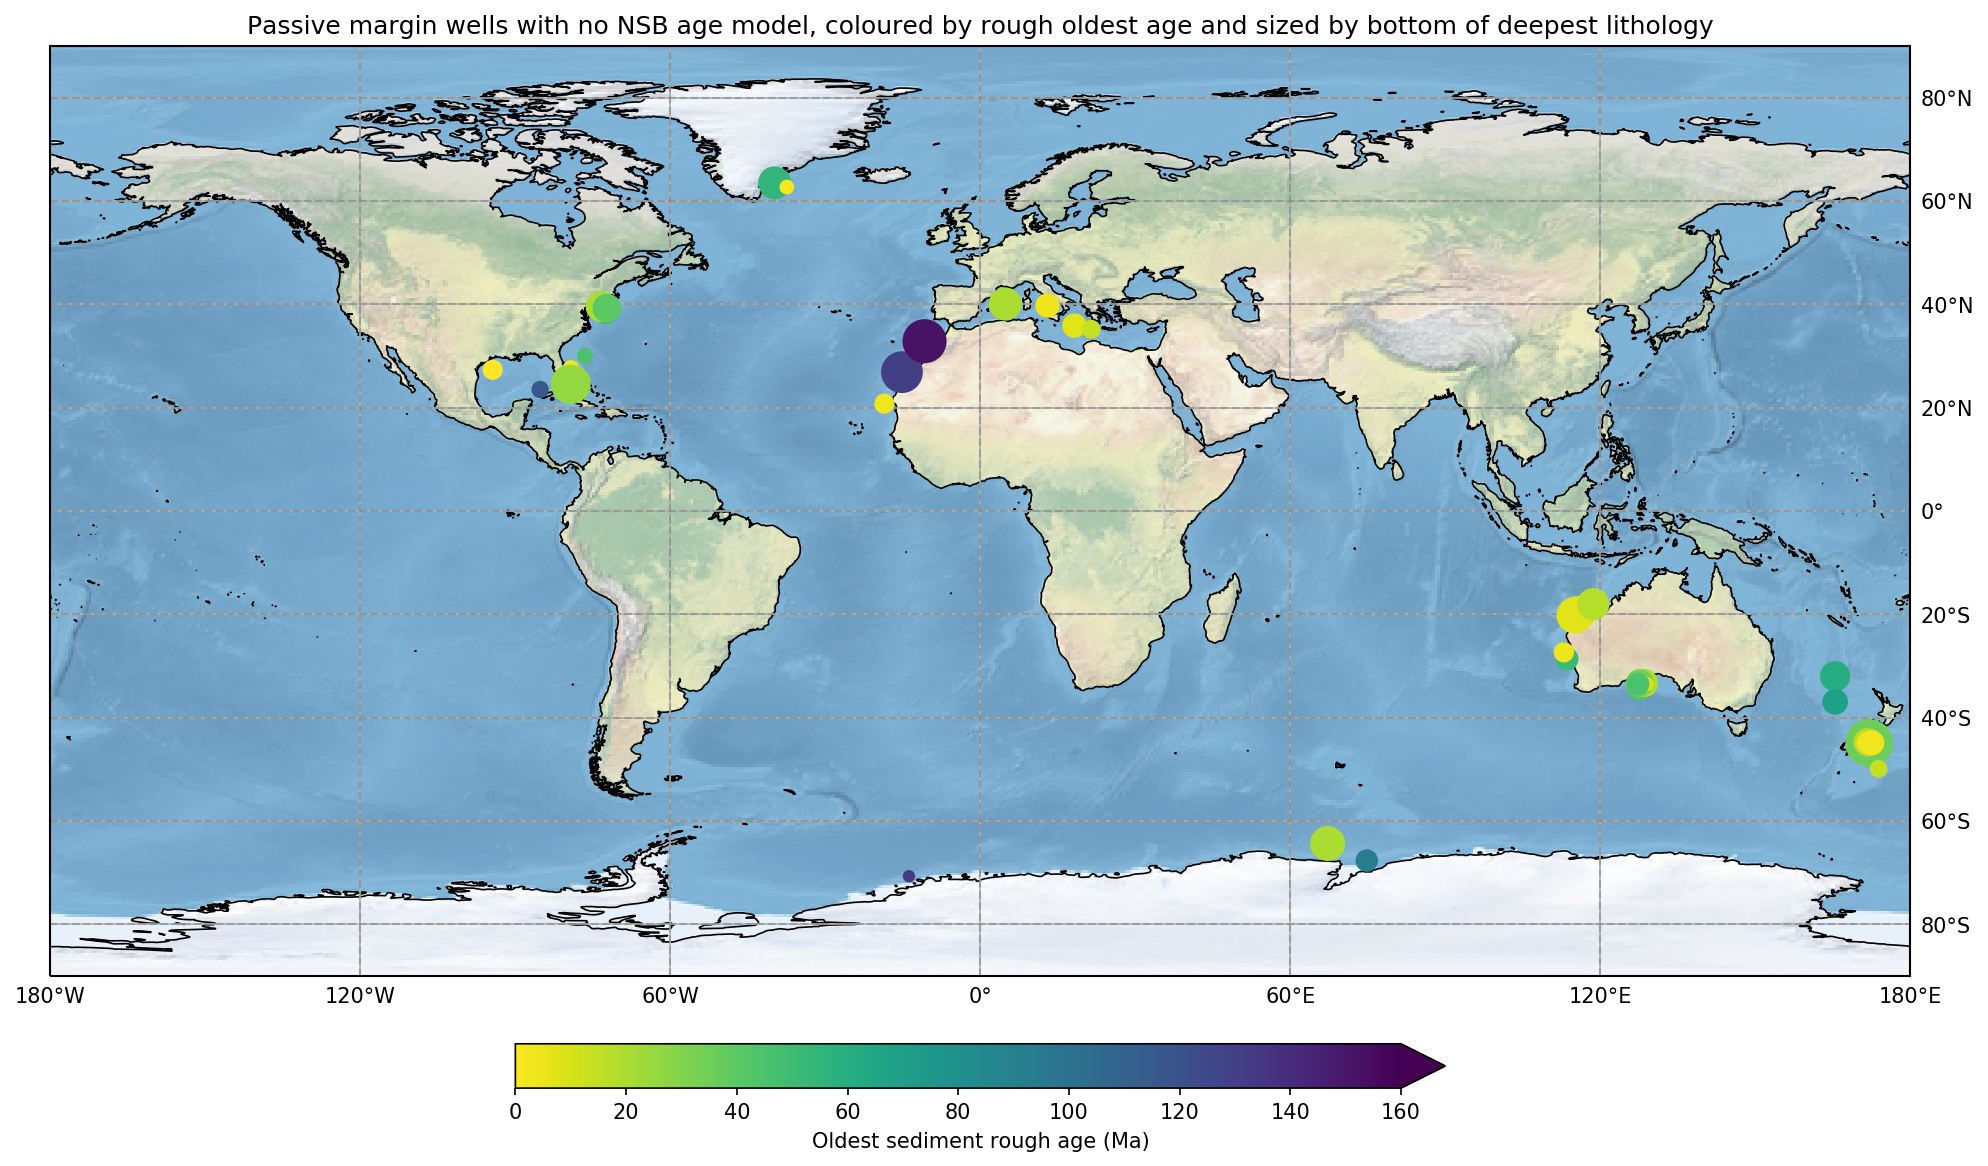

In [16]:
#map of age and depth indication
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
mapscat=ax.scatter(longs,lats,marker=".",s=depth,c=age,vmin=0,vmax=160,transform=cartopy.crs.Geodetic(),zorder=4,cmap=plt.cm.viridis_r)

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


#colour bar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Oldest sediment rough age (Ma)')

plt.title('Passive margin wells with no NSB age model, coloured by rough oldest age and sized by bottom of deepest lithology')
plt.show()

In [30]:
#colour map for scatter
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=54)

timestep=np.arange(0,55,1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

Text(0,0.5,'Bottom depth of deepest lithology (mbsf)')

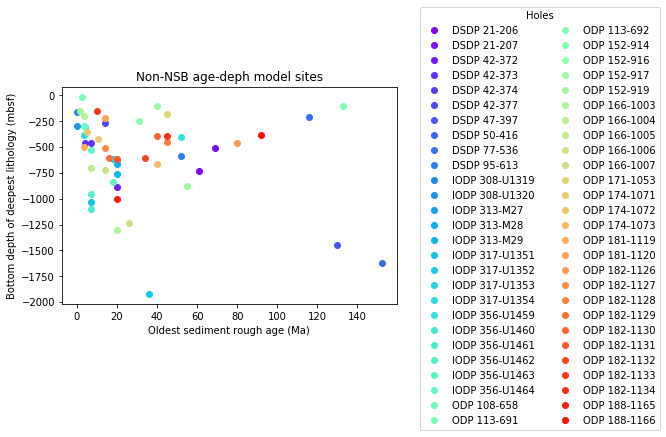

In [58]:
#Scatter
for i in np.arange(0,54,1):
    plt.plot(age[i], depth[i]*-1,'o', label=name[i], c=c[i])
    
plt.legend(title='Holes', loc='lower right',ncol=2, bbox_to_anchor=(1.8, -0.6))
plt.title('Non-NSB age-deph model sites')
plt.xlabel('Oldest sediment rough age (Ma)')
plt.ylabel('Bottom depth of deepest lithology (mbsf)')